**Importamos Datos**

In [1]:
# Importar Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

* **Importamos la base de datos df_dep, que es el resultado de la depuración de los datos, el código que genera la depuración se llama depuración y se encuentra en esta carpeta.**

* **También importamos la Base de Datos GEO; la cual contiene las coordenadas geográficas que utilizaremos para graficar en un mapa la ubicación de los países.**

* **Las bases de datos se encuentran en la carpeta Insumos.**


In [2]:
geo = pd.read_excel(r"D:\Usuarios\oscagaal\Documents\Introduccion a la Ciencia de Datos\Insumos\GEO.xlsx")
df = pd.read_csv(r"D:\Usuarios\oscagaal\Documents\Introduccion a la Ciencia de Datos\Insumos\df_dep.csv")

**Visualizamos los 5 primeros registros**

In [3]:
geo.head(5)

,Country,lat,log
0,Argentina,-38.416097,-63.616672
1,Australia,-25.274398,133.775136
2,Austria,47.516231,14.550072
3,Belgium,50.503887,4.469936
4,Brazil,-14.235004,-51.925280


In [4]:
df.head(5)

,Country,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,Continente
0,United States,3.0,4.0,1.9,4.0,-2.4,-3.8,2.70,2.66,2019,Norte America
1,United States,2.3,-5.5,1.5,4.4,-2.1,-12.3,1.11,0.65,2020,Norte America
2,China,6.4,5.7,1.9,3.8,0.3,-3.9,2.90,2.91,2019,Asia
3,China,-6.8,-1.1,4.3,3.6,1.8,-5.5,1.39,2.00,2020,Asia
4,Japan,0.0,-1.9,0.3,2.4,3.7,-3.5,0.00,0.00,2019,Asia


**Realizamos un cruce de bases de datos para tener las coordenadas en la base principal df**

In [5]:
df = pd.merge(df,geo, how="inner",left_on="Country",right_on='Country')

In [6]:
df.head(2)


,Country,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,Continente,lat,log
0,United States,3.0,4.0,1.9,4.0,-2.4,-3.8,2.70,2.66,2019,Norte America,37.09024,-95.712891
1,United States,2.3,-5.5,1.5,4.4,-2.1,-12.3,1.11,0.65,2020,Norte America,37.09024,-95.712891


**Creamos un filtro a través de un input, que le permite al usuario elegir el año de análisis**

In [7]:
Año = int(input("Ingre el Año de Analisis"))
df_Año = df[df["Año"]==Año]

df[df["Año"]==2019].describe() # resumen estadistico filtrado por ek input

Ingre el Año de Analisis 2019


,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,lat,log
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000
mean,2.636818,0.638636,3.293182,5.484091,1.377273,-1.365909,3.380227,3.282955,2019.0,28.036366,26.931555
std,1.922334,5.124869,7.377414,3.440115,4.884854,2.515713,7.136498,3.282879,0.0,29.822360,70.211058
min,-3.500000,-18.000000,0.200000,0.000000,-6.000000,-7.100000,0.000000,0.000000,2019.0,-40.900557,-106.346771
25%,1.675000,-1.600000,0.975000,3.550000,-2.400000,-2.775000,0.000000,0.862500,2019.0,11.686460,-3.514285
50%,2.400000,1.100000,1.900000,4.750000,0.400000,-1.600000,1.390000,2.115000,2019.0,39.018977,18.894319
75%,3.050000,2.725000,2.600000,6.175000,3.175000,-0.100000,3.675000,4.360000,2019.0,49.989091,101.238347
max,7.120000,15.000000,47.100000,18.000000,17.900000,7.000000,41.000000,14.000000,2019.0,61.924110,174.885971


**Creamos una visualización con un Mapa utilizando la librería Folium Mapa**

In [8]:
import folium
from folium.plugins import MarkerCluster

In [9]:
world_map = folium.Map(tiles="OpenStreetMap")
marker_cluster= MarkerCluster().add_to(world_map)
for i in range(len(df_Año)):
        lat = df_Año.iloc[i]["lat"]
        long = df_Año.iloc[i]["log"]
        radius=5
        pupup_text="""Country : {}<br>
                     GDP : {}<br>"""
        pupup_text= pupup_text.format(df_Año.iloc[i]["Country"],df_Año.iloc[i]["GDP_Latest"])
        folium.CircleMarker(location=[lat,long],radius=radius,pupup=pupup_text, fill=True).add_to(marker_cluster)
world_map

**Análisis  de variables numéricas**

**¿Qué es un valor atípico?**

"Un valor atípico es una observación extrañamente grande o pequeña. Los valores atípicos pueden tener un efecto desproporcionado en los resultados estadísticos, como la media, lo que puede conducir a interpretaciones engañosas. Por ejemplo, un conjunto de datos incluye los valores: 1, 2, 3, y 34. El valor medio, 10, que es mayor que la mayoría de los datos (1, 2, 3), se ve muy afectado por el punto extremo de los datos: 34. En este caso, el valor medio hace que parezca que los valores de los datos son más altos de lo que realmente son. Es necesario investigar los valores atípicos, porque pueden proporcionar información útil sobre los datos o el proceso. Con frecuencia, la manera más fácil de identificar los valores atípicos es graficando los datos."

### Uso de gráficas Univariadas para identificar valores atípicos 

**Variable GDP_Latest**

**Revisamos la distribución de los datos con un histograma**

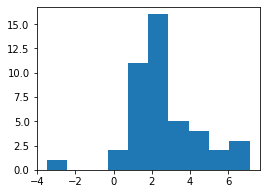

In [10]:
plt.figure(figsize=(4,3))
plt.hist(df_Año['GDP_Latest'])
plt.show()

**Revisamos la distribución de los datos con un grafico de puntos**

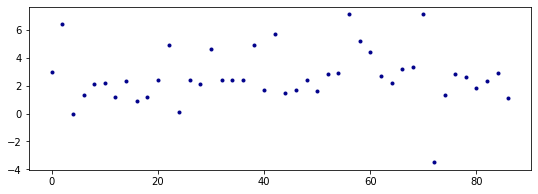

In [11]:
plt.figure(figsize=(9,3))
plt.plot(df_Año['GDP_Latest'],".",color="darkblue")
plt.show()

Esta gráfica de dispersión muestra un posible valor atípico inferior

**Revisamos la distribución de los datos con un boxplot**

AxesSubplot(0.125,0.125;0.775x0.755)


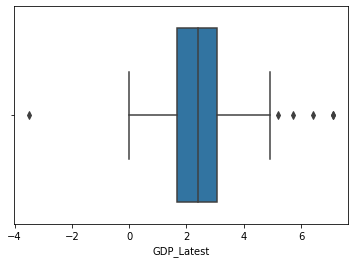

In [12]:
print(sns.boxplot(x=df_Año['GDP_Latest']))

En las gráficas de caja,python usa un símbolo de asterisco (*) para identificar los valores atípicos. Estos valores atípicos son observaciones que están a por lo menos 1.5 veces el rango intercuartil (Q3 – Q1) del borde de la caja.

En algunos casos, se debe examinar más de un tipo de gráfica, porque los valores atípicos que se observan claramente en una gráfica pueden no ser tan obvios en otra gráfica. La gráfica de caja y el histograma utilizan los mismos datos. El valor atípico es obvio en la gráfica de caja, pero no tan obvio en el histograma

**Causas comunes de los valores atípicos**

Causa: Acciones posibles

* Error de entrada de datos:Corregir el error y volver a analizar los datos.
* Problema del proceso: Investigar el proceso para determinar la causa del valor atípico.
* Factor faltante: Determinar si no se consideró un factor que afecta el proceso.
* Probabilidad aleatoria: Investigar el proceso y el valor atípico para determinar si este se produjo en virtud de las probabilidades; realice el análisis con y sin el valor atípico para ver su impacto en los resultados.

**Excluir atípicos con rango intercuartil**

In [13]:
q1, q3 = np.percentile(df_Año['GDP_Latest'],[25,75])

In [14]:
iqr = q3 - q1 # Rango Intercuanqil

In [15]:
# Encuentra el límite inferior y superior
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [16]:
lower_bound 

-0.3875000000000002

In [17]:
upper_bound 

5.1125

**Graficamos el Limite superior e inferior**

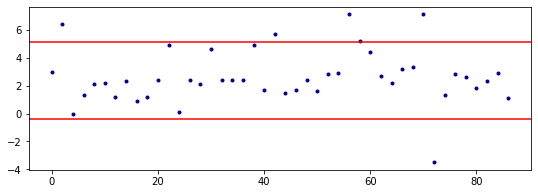

In [18]:
plt.figure(figsize=(9,3))
plt.plot(df_Año['GDP_Latest'] ,".",color="darkblue")
plt.axhline(y=upper_bound ,color="r",linestyle="-")
plt.axhline(y=lower_bound ,color="r",linestyle="-")
plt.show()

**Paises con un tasas de crecimiento en PIB muy grandes**

In [19]:
df_Año[df_Año['GDP_Latest'] > upper_bound ]

,Country,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,Continente,lat,log
2,China,6.40,5.7,1.9,3.8,0.3,-3.9,2.90,2.91,2019,Asia,35.861660,104.195397
42,Poland,5.70,2.7,1.1,5.8,-0.5,-0.9,1.52,2.72,2019,Europa,51.919438,19.145136
56,India,7.10,0.5,2.2,7.1,-2.7,-3.6,6.38,7.52,2019,Asia,20.593684,78.962880
58,Indonesia,5.20,1.5,2.8,5.3,-2.8,-1.9,7.37,7.90,2019,Asia,-0.789275,113.921327
70,Vietnam,7.12,7.9,2.6,2.2,1.8,-6.1,5.00,4.87,2019,Asia,14.058324,108.277199


**Paises con Tasas de crecimiento en PIB Negativas en este caso, paises en crisis**

In [20]:
 df_Año[df_Año['GDP_Latest']  < lower_bound ]

,Country,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,Continente,lat,log
72,Argentina,-3.5,-7.1,47.1,9.0,-6.0,-5.5,41.0,11.0,2019,America del Sur,-38.416097,-63.616672


**Datos sin atípicos**

In [21]:
sin_atip = df_Año[(df_Año['GDP_Latest']> lower_bound ) & (df_Año['GDP_Latest']<upper_bound)]


In [22]:
sin_atip['GDP_Latest'].mean()

2.31578947368421

In [23]:
df_Año['GDP_Latest'].mean()

2.6368181818181817

El promedio sin atípicos es de 2.3 mientras que con atípicos el promedio es de 2.6, en este caso vemos que los atípicos inflan el promedio en 3 puntos porcentuales.

**Es importante recordar que estamos en un enfoque de estimación puntual, es interesante también identificar los intervalos de confianza, en el que podamos movernos en la estimación.**

**Además, realizar una prueba de bondad de ajuste para determinar si los datos son normales, y si no son normales ¿cuál es la verdadera distribución de los datos?  ¿cómo podríamos aproximarnos al parámetro real de la población? en este caso ¿cuál es crecimiento promedio de la economía mundial? todas estas preguntas las iremos respondiendo más adelante.
Feliz semana**


**Test Normal**

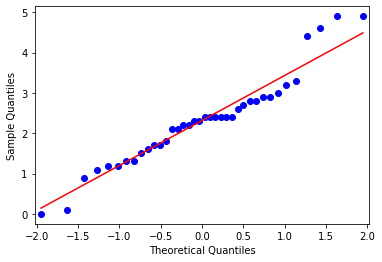

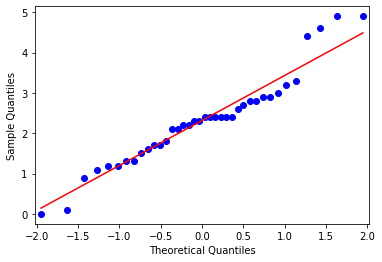

In [24]:
from statsmodels.graphics.gofplots import qqplot
qqplot(sin_atip['GDP_Latest'],line="s")

**Test Normal Kolmogorov**

In [25]:
from scipy import stats
pib= sin_atip['GDP_Latest']

In [26]:
media,desviacion = stats.norm.fit(pib)
media

2.31578947368421

In [27]:
d,pvalor = stats.kstest(pib,"norm",args=(media,desviacion))

In [28]:
pvalor

0.5324490547931816

H0: La muestra proviene de una distribución normal.

H1: La muestra no proviene de una distribución normal.

alfa = 0.05

SI p < alfa , se rechaza normlidad 

**Shapiro**

In [29]:
stat,p_valor = stats.shapiro(pib)

In [30]:
p_valor

0.0715477243065834

**Remuestreo Por Boostrap**

In [31]:
from random import sample
import math

In [32]:
df_Inicial = sin_atip
df_Inicial.shape

(38, 13)

In [33]:
p_inicial = pib.mean()
p_inicial

2.31578947368421

In [34]:
df_Inicial.head()

,Country,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,Continente,lat,log
0,United States,3.0,4.0,1.9,4.0,-2.4,-3.8,2.70,2.66,2019,Norte America,37.090240,-95.712891
4,Japan,0.0,-1.9,0.3,2.4,3.7,-3.5,0.00,0.00,2019,Asia,36.204824,138.252924
6,Britain,1.3,-0.8,2.1,4.0,-3.9,-1.3,0.88,1.23,2019,Europa,55.378052,-3.435973
8,Canada,2.1,1.8,2.0,5.8,-2.8,-2.2,2.10,1.88,2019,Norte America,56.130366,-106.346771
10,Austria,2.2,1.0,1.9,4.7,2.1,-0.2,0.00,0.33,2019,Europa,47.516231,14.550072


In [35]:
bins= np.arange(0.12,1)
Muestra=df_Inicial.sample(n=35,replace=False)


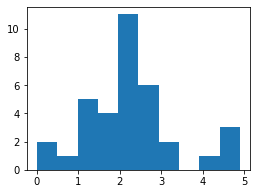

In [36]:
plt.figure(figsize=(4,3))
plt.hist(Muestra["GDP_Latest"])
plt.show()

In [37]:
media_muestra = Muestra["GDP_Latest"].mean()

In [38]:
media_muestra

2.3085714285714287

## **Remuestreo**
* *Permiten obtener conclusiones acerca de una población usando muestras extraídas de una muestra aleatoria que fue extraída de una población*

* *Se caracterizan porque no requieren suposiciones sobre la población.*
* *El número de Remuestreo es muy grande por lo que se necesita del cálculo intensivo computacional para el desarrollo.*

<img src="remuestreo.png" width=300, align = "center">

### Técnicas comunes de remuestreo:
* *Bootstrapping*
* *Jackknifing*
* *Pruebas de permutación.*


### 1) Método Bootstrap

* *El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979.*


* *Es un método de remuestreo mediante muestreo independiente con reemplazo de datos de muestra existentes con el mismo tamaño de muestra n, y realizando inferencia entre estos datos remuestreados.*

<img src="https://miro.medium.com/max/1926/1*iH5w0MBdiOlxDOCX6nmqqw.png" width=400, align = "center">


### Ventajas
* *Como la población es desconocida, el verdadero error en una muestra estadística contra su valor poblacional es desconocido. En las re-muestras de bootstrap, la 'población' es de hecho la muestra, y esto se conoce; por lo tanto, se puede medir la calidad de la inferencia de la muestra "verdadera" a partir de datos remuestreados*


* *No es exigente al cumplimiento de supuestos teóricos para su aplicación*


* Resulta Muy intuitivo

### Desventajas

* Mayor recurso de Maquina

* Cuando se cumplen los supuestos del enfoque Frecuentista. el remuestreo puede ser menos eficiente

**Aplicacion del Boostrap**

Como sabemos, el procedimiento de muestreo se puede replicar tomando muestras de la muestra

Ahora replicamos el proceso de arranque 10.000 veces. La matriz sample_median contiene las medianas de las 10,000 muestras de bootstrap. Tenga en cuenta que el código tarda más en ejecutarse que nuestro código anterior. ¡Tiene mucho remuestreo que hacer!

In [39]:
sample_medias= []

for i in range(10000):
    sample_n = Muestra.sample(n=500,replace=True)
    sample_medias.append(sample_n["GDP_Latest"].mean())

In [40]:
R_M = np.mean(sample_medias)
R_M 


2.30878442

In [41]:
p_inicial

2.31578947368421

**El Bootstrap: Distribución empírica de la media de la muestra**


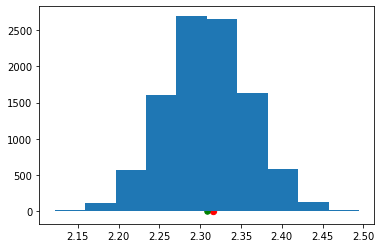

In [42]:
plt.hist(sample_medias)
plt.scatter(p_inicial,0,color="red",s=40)
plt.scatter(R_M,0,color="green",s=30)

In [43]:
import statsmodels.stats.api as sms

In [44]:
sms.DescrStatsW(sample_medias).tconfint_mean()

(2.3077934392388766, 2.309775400761123)

¿Las estimaciones capturan el parámetro?

¿Con qué frecuencia el histograma empírico de las medianas muestreadas se asienta firmemente sobre el punto rojo y no solo roza el punto con sus colas? Para responder a esto, debemos definir "sentarse firmemente". Supongamos que significa "el 95% en promedio de las medias muestreadas contiene el punto rojo".

Estos son los dos extremos del intervalo "95% medio" de las medias remuestreadas:

## **Visualizacion de Agrupacion de paises por variables**

In [45]:
df = df_Año
df.head(2)

,Country,GDP_Latest,Industrial Product,CPI,Unemployment,current_account,budget balance,short rates,long rates,Año,Continente,lat,log
0,United States,3.0,4.0,1.9,4.0,-2.4,-3.8,2.7,2.66,2019,Norte America,37.09024,-95.712891
2,China,6.4,5.7,1.9,3.8,0.3,-3.9,2.9,2.91,2019,Asia,35.86166,104.195397


**Segun su ubocacion geografica**

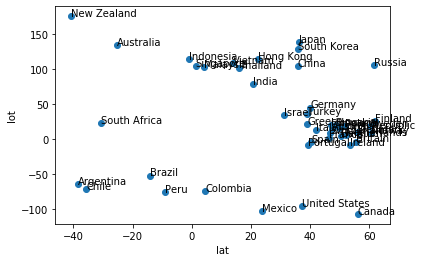

In [46]:
import matplotlib.pyplot as plt

x = df["lat"].to_numpy()
y = df["log"].to_numpy()

# Genero 20 ids para los puntos
ids = df["Country"].to_numpy().astype("str")
plt.scatter(x, y)
plt.xlabel("lat")
plt.ylabel("lot")

# Etiquetar los puntos
for i, txt in enumerate(ids):
    plt.annotate(str(txt), (x[i],y[i]))

plt.show()

**Segun tasas de interes y desempleo**

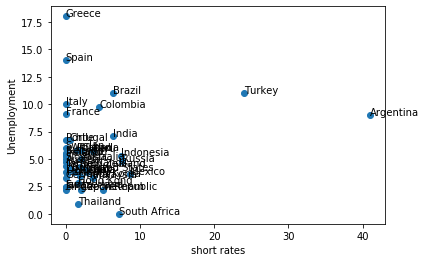

In [47]:
import matplotlib.pyplot as plt

x = df["short rates"].to_numpy()
y = df["Unemployment"].to_numpy()

# Genero 20 ids para los puntos
ids = df["Country"].to_numpy().astype("str")
plt.scatter(x, y)
plt.xlabel("short rates")
plt.ylabel("Unemployment")

# Etiquetar los puntos
for i, txt in enumerate(ids):
    plt.annotate(str(txt), (x[i],y[i]))

plt.show()

**Segun Inflacion y PIB**

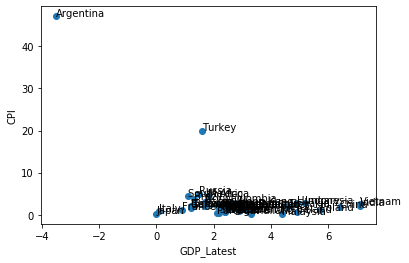

In [48]:
x = df["GDP_Latest"].to_numpy()
y = df["CPI"].to_numpy()

# Genero 20 ids para los puntos
ids = df["Country"].to_numpy().astype("str")
plt.scatter(x, y)
plt.xlabel("GDP_Latest")
plt.ylabel("CPI")

# Etiquetar los puntos
for i, txt in enumerate(ids):
    plt.annotate(str(txt), (x[i],y[i]))

plt.show()

**Podemos ver que los países se empiezan a mover o agruparse diferentes de acuerdo con las variables económicas, la posición geográfica no implica que un país sea igual en términos económicos con sus vecinos,
En la próxima sesión vamos a encontrar esos grupos de países similares en términos economicos por medio de algoritmos de machine learning no supervisados.**
